# Import do dataset:

In [2]:
import pandas as pd
import random
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt

In [2]:
original_df = pd.read_csv('FIFA 2023.csv')

original_df

,player_id,gk,ls,st,rs,lw,lf,cf,rf,rw,...,rcb,rb,short_name,long_name,overall,potential,value_eur,wage_eur,dob,club_name
0,231747,8,93,93,93,91,91,91,91,91,...,57,66,K. Mbappé,Kylian Mbappé Lottin,91,94,181500000.0,230000.0,1998-12-20,Paris Saint Germain
1,239085,10,93,93,93,82,86,86,86,82,...,65,63,E. Haaland,Erling Braut Haaland,91,94,185000000.0,340000.0,2000-07-21,Manchester City
2,192985,11,86,86,86,87,88,88,88,87,...,73,78,K. De Bruyne,Kevin De Bruyne,91,91,103000000.0,350000.0,1991-06-28,Manchester City
3,158023,11,88,88,88,90,89,89,89,90,...,52,62,L. Messi,Lionel Andrés Messi Cuccittini,90,90,41000000.0,23000.0,1987-06-24,Inter Miami
4,165153,8,90,90,90,86,89,89,89,86,...,58,63,K. Benzema,Karim Benzema,90,90,51000000.0,95000.0,1987-12-19,Al Ittihad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18345,273759,10,35,35,35,29,29,29,29,29,...,49,45,S. Telem,Saphaba Singh Telem,47,57,100000.0,500.0,2003-01-03,Jamshedpur
18346,269013,9,37,37,37,34,34,34,34,34,...,49,48,Jin Liangkuan,金良宽,47,55,100000.0,1000.0,2002-01-28,Meizhou Hakka
18347,272748,9,49,49,49,47,47,47,47,47,...,29,35,M. Mewlan,买乌郎·米吉提,47,55,100000.0,2000.0,2004-01-27,Shandong Taishan
18348,269534,11,47,47,47,46,46,46,46,46,...,46,47,Yin Jie,尹杰,47,54,90000.0,1000.0,2001-09-25,Zhejiang


# Remover colunas irrelevantes:

In [3]:
df = original_df.drop(columns=["long_name", "club_name", "short_name"])

df

,player_id,gk,ls,st,rs,lw,lf,cf,rf,rw,...,lb,lcb,cb,rcb,rb,overall,potential,value_eur,wage_eur,dob
0,231747,8,93,93,93,91,91,91,91,91,...,66,57,57,57,66,91,94,181500000.0,230000.0,1998-12-20
1,239085,10,93,93,93,82,86,86,86,82,...,63,65,65,65,63,91,94,185000000.0,340000.0,2000-07-21
2,192985,11,86,86,86,87,88,88,88,87,...,78,73,73,73,78,91,91,103000000.0,350000.0,1991-06-28
3,158023,11,88,88,88,90,89,89,89,90,...,62,52,52,52,62,90,90,41000000.0,23000.0,1987-06-24
4,165153,8,90,90,90,86,89,89,89,86,...,63,58,58,58,63,90,90,51000000.0,95000.0,1987-12-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18345,273759,10,35,35,35,29,29,29,29,29,...,45,49,49,49,45,47,57,100000.0,500.0,2003-01-03
18346,269013,9,37,37,37,34,34,34,34,34,...,48,49,49,49,48,47,55,100000.0,1000.0,2002-01-28
18347,272748,9,49,49,49,47,47,47,47,47,...,35,29,29,29,35,47,55,100000.0,2000.0,2004-01-27
18348,269534,11,47,47,47,46,46,46,46,46,...,47,46,46,46,47,47,54,90000.0,1000.0,2001-09-25


# Verificar missing values:

Confirmar se existem missing values:

In [4]:
df.isnull().values.any()

True

Descobrir em que colunas temos missing values:

In [5]:
for column in df.columns:
    if df[column].isnull().any():
        print(f"Column '{column}' has missing values.")

Column 'value_eur' has missing values.
Column 'wage_eur' has missing values.


Substituir missing values (neste caso por 0):

In [6]:
#df['value_eur'].fillna(df['value_eur'].mean(), inplace=True)
#df['wage_eur'].fillna(df['wage_eur'].mean(), inplace=True)

df['value_eur'].fillna(0, inplace=True)
df['wage_eur'].fillna(0, inplace=True)

Confirmar se foram removidos os missing values:

In [7]:
df.isnull().values.any()

False

# Juntar posições equivalentes


Ficando a média dos valores:

In [9]:
# Define the position groups
positions = {
    'lf': ['lf', 'lw', 'ls', 'lam'],
    'cf': ['cf', 'st'],
    'rf': ['rf', 'rw', 'rs', 'ram'],
    'lm': ['lm', 'lwb'],
    'cm': ['cm', 'lcm', 'rcm', 'cam'],
    'rm': ['rm', 'rwb'],
    'lb': ['lb', 'ldm'],
    'lcb': ['lcb', 'cb'],
    'rcb': ['rcb', 'cdm'],
    'rb': ['rb', 'rdm']
}

# Iterate over the position groups and compute the mean
for position, columns in positions.items():
    df[position] = df[columns].mean(axis=1)

# Drop the unnecessary columns
df.drop(['lw', 'ls', 'lam','st','rw','rs','ram','lwb','lcm','rcm','cam','rwb','ldm','cb','cdm','rdm'], axis=1, inplace=True)

df

,player_id,gk,lf,cf,rf,lm,cm,rm,lb,lcb,rcb,rb,overall,potential,value_eur,wage_eur,dob
0,231747,8,91.75,92.0,91.75,81.5,86.00,81.5,66.0,57.0,61.5,66.0,91,94,181500000.0,230000.0,1998-12-20
1,239085,10,86.50,89.5,86.50,73.5,79.00,73.5,64.5,65.0,65.5,64.5,91,94,185000000.0,340000.0,2000-07-21
2,192985,11,88.00,87.0,88.00,86.5,91.00,86.5,80.5,73.0,78.0,80.5,91,91,103000000.0,350000.0,1991-06-28
3,158023,11,89.25,88.5,89.25,78.5,88.50,78.5,64.0,52.0,59.0,64.0,90,90,41000000.0,23000.0,1987-06-24
4,165153,8,88.75,89.5,88.75,78.0,86.25,78.0,65.0,58.0,62.5,65.0,90,90,51000000.0,95000.0,1987-12-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18345,273759,10,30.75,32.0,30.75,38.0,30.75,38.0,43.0,49.0,45.0,43.0,47,57,100000.0,500.0,2003-01-03
18346,269013,9,35.00,35.5,35.00,41.5,36.50,41.5,46.5,49.0,47.0,46.5,47,55,100000.0,1000.0,2002-01-28
18347,272748,9,47.50,48.0,47.50,42.5,43.25,42.5,34.0,29.0,31.0,34.0,47,55,100000.0,2000.0,2004-01-27
18348,269534,11,47.00,46.5,47.00,48.0,49.00,48.0,47.0,46.0,46.5,47.0,47,54,90000.0,1000.0,2001-09-25


# Generação de equipas:

Gerar conjuntos de 11 jogadores aleatorios para cada posição, para serem usados na função fitness

In [10]:

Team = {'lm': -1,
        'rm': -1, 
        'lcb': -1, 
        'lf': -1, 
        'rb': -1, 
        'gk': -1, 
        'lb': -1, 
        'rcb': -1, 
        'cf': -1, 
        'cm': -1, 
        'rf': -1
       }



def divide_players_into_positions (df):
    
    # Initialize the dictionary to store players by position
    PositionDic = {
        'lm': [],
        'rm': [], 
        'lcb': [], 
        'lf': [], 
        'rb': [], 
        'gk': [], 
        'lb': [], 
        'rcb': [], 
        'cf': [], 
        'cm': [], 
        'rf': []
    }


    # Iterate over each player in the dataset
    for index, player in df.iterrows():
        
        player_id = player['player_id']
    
        #print(player_id)
        
        excluded_attributes = ['player_id', 'overall', 'potential', 'value_eur', 'wage_eur', 'dob']

        best_score = 0
        
        selected_pos = []
        
        # encontra as melhores posiçoes para o player e guarda-as numa lista (podem ser mais que uma se forem iguais)
        for pos_name, pos_value in player.items():
            
            if pos_name not in excluded_attributes:
                
                if pos_value > best_score:
                    best_score = pos_value
                    selected_pos = []
                    selected_pos.append(pos_name)
                    
                elif pos_value == best_score:
                    selected_pos.append(pos_name)
                    
        # coloca o player_id nas posições do dicionario correspondentes às melhores posiçoes do jogador
        for pos in selected_pos:
            if pos in PositionDic:
                PositionDic[pos].append(player_id)

    return PositionDic


def randomTeaming(df, team, pos_dic):
    
    # Copy the original team dictionary to avoid modifying it directly
    generated_team = team.copy()
    
    # Keep track of selected players
    selected_players = set()
    
    # Iterate over each position in the team
    for position, player_ids in pos_dic.items():
        
        # Check if there are available players for the current position
        available_players = [player for player in player_ids if player not in selected_players]

        # Randomly choose a player for the current position from available players
        if available_players:
            selected_player = random.choice(available_players)

            # Assign the selected player to the team
            generated_team[position] = selected_player

            # Add the selected player to the set of selected players
            selected_players.add(selected_player)


    return generated_team




In [11]:
pos_dic=divide_players_into_positions(df)

Gerar a lista de equipas:

In [12]:
TeamsList = []
Population = 500
for i in range (Population):
    TeamsList.append(randomTeaming(df, Team,pos_dic))

# Função auxiliar para encontrar informações sobre jogadores:

In [14]:
def findStat(playerID, stat, df):
    try:
        # Use .loc for indexing and check for missing values
        row = df.loc[df['player_id'] == playerID, stat]
        
        if row.empty or row.isna().any():
            raise Warning(f"No data found for player with ID {playerID} or missing values in {stat}")

        return row.iloc[0]  # Extract the value using .iloc for a scalar result
    except IndexError:
        return f"No data found for player with ID {playerID}"

teste da função:

In [15]:
type(findStat(259617,'gk',df))

numpy.int64

In [16]:
findStat(259617,'potential',df)

62

# Função auxiliar para encontrar o maior valor num stat específico:

(útil para testes)

In [17]:
def max_value_in_stat(df, stat):
    try:
        max_value = df[stat].max()
        #max_value = df[stat].min()
        return max_value
    except KeyError:
        # Handle the case where the column_name is not found in the DataFrame
        return f"Column '{stat}' not found in the DataFrame."

teste da função:

In [18]:
print(max_value_in_stat(df, 'player_id'))

278145


# Função auxiliar para encontrar jogadores:

(útil para testes)

In [19]:
def findPlayer (statName, statValue, df):
    
    try:
        # Find the row where playerID matches the provided ID
        row = df[df[statName] == statValue]

        if row.empty:
            # Raise a Warning if the player ID is not found
            raise Warning(f"No player found with stat with value {statValue}")
    # Return the value in the specified stat_column
    
        #return row[stat].values[0]
        return row['player_id'].values[0]
    except IndexError:
        # Handle the case where the player ID is not found
        return f"No player found with stat with value {statValue}"


In [20]:
print(findPlayer('lm', 80, df))

224293


# Fitness Function:

Evaluates how good a team is based on the selected players' attributes. This function will be used by the genetic algorithm to optimize the team.

In [21]:
present_date = datetime.now()
present_date_pandas = pd.to_datetime(present_date)

In [22]:
def fitness_function(teamDic, aq_amount, wages_amount, df, present_date_pandas):
    
    player_ids = list(teamDic.values())
    selected_players = df[df['player_id'].isin(player_ids)]
    
    total_acquisition_cost = selected_players['value_eur'].sum()
    total_wage_cost = selected_players['wage_eur'].sum()
    
    cost_constraint = total_acquisition_cost <= aq_amount
    wage_constraint = total_wage_cost <= wages_amount
    
    if not cost_constraint or not wage_constraint:
        return 0.0
    
    # --------------------- CALCULOS PRINCIPAIS ---------------------
    
    # Extracting required player information
    overall_scores = selected_players['overall']
    dob_pandas = pd.to_datetime(selected_players['dob'])
    ages = (present_date_pandas - dob_pandas).dt.days / 365.25
    
    # Calculations using vectorized operations
    player_score_list = (overall_scores * 0.8) + 20 * (1 - (ages - 16) / (45 - 16))
    
    variance = np.var(player_score_list)
    var_score = 100 - variance
    
    player_score_avg = player_score_list.mean()
    overall_rating_avg = overall_scores.mean()
    
    price_difference = aq_amount - total_acquisition_cost
    wage_difference = wages_amount - total_wage_cost
    
    fitness_score = (
        player_score_avg * 0.4 + overall_rating_avg * 0.3 + var_score * 0.1 +
        (1 - price_difference / aq_amount) * 100 * 0.1 + 
        (1 - wage_difference / wages_amount) * 100 * 0.1
    )
    
    
    return fitness_score

Exemplificação da volatilidade do score de variancia:

In [11]:
v1 = np.var([1,100,20,90,15,50,70,80,95,25,30])
v2 = np.var([70,100,70,90,70,70,70,80,95,70,70])
v3 = np.var([80,100,80,90,80,80,80,80,95,80,80])
v4 = np.var([87,90,87,90,85,87,85,85,95,87,85])

print(100 - v1)
print(100 - v2)
print(100 - v3)
print(100 - v4)

-1074.0495867768595
-24.380165289256198
50.82644628099174
91.38842975206612


In [23]:
def fitness_function_for_testing(teamDic, aq_amount, wages_amount, df, present_date_pandas):
    
    player_ids = list(teamDic.values())
    selected_players = df[df['player_id'].isin(player_ids)]
    
    total_acquisition_cost = selected_players['value_eur'].sum()
    total_wage_cost = selected_players['wage_eur'].sum()
    
    cost_constraint = total_acquisition_cost <= aq_amount
    wage_constraint = total_wage_cost <= wages_amount
    
    if not cost_constraint or not wage_constraint:
        return 0.0
    
    # --------------------- CALCULOS PRINCIPAIS ---------------------
    
    # Extracting required player information
    overall_scores = selected_players['overall']
    dob_pandas = pd.to_datetime(selected_players['dob'])
    ages = (present_date_pandas - dob_pandas).dt.days / 365.25
    
    # Calculations using vectorized operations
    player_score_list = (overall_scores * 0.8) + 20 * (1 - (ages - 16) / (45 - 16))
    
    variance = np.var(player_score_list)
    var_score = 100 - variance
    
    player_score_avg = player_score_list.mean()
    overall_rating_avg = overall_scores.mean()
    
    price_difference = aq_amount - total_acquisition_cost
    wage_difference = wages_amount - total_wage_cost
    
    fitness_score = (
        player_score_avg * 0.4 + overall_rating_avg * 0.3 + var_score * 0.1 +
        (1 - price_difference / aq_amount) * 100 * 0.1 + 
        (1 - wage_difference / wages_amount) * 100 * 0.1
    )
    
    
    # --------------------- PRINTS ---------------------
    
    print(f"average player score: {player_score_avg}")
    print(f"average overall: {overall_rating_avg}")
    print(f"price score: {(1 - price_difference / aq_amount) * 100}")
    print(f"wage score: {(1 - wage_difference / wages_amount) * 100}")
    print(f"variance score: {var_score}")
    
    return fitness_score

Equipa exemplo, real madrid:

In [24]:
realmadrid = {'lm': 248243,
        'rm': 239053, 
        'lcb': 197445, 
        'lf': 238794, 
        'rb': 244260, 
        'gk': 192119, 
        'lb': 228618, 
        'rcb': 240130, 
        'cf': 252371, 
        'cm': 241637, 
        'rf': 243812
       }


In [25]:
print(f"fitness score: {fitness_function_for_testing(realmadrid, 849000000,2126000, df, present_date_pandas)}")

average player score: 81.7812937846925
average overall: 85.45454545454545
price score: 100.0
wage score: 100.0
variance score: 91.99189555712628
fitness score: 87.54807070595325


# Genetic Algorythm:

The main loop of the genetic algorithm. This function involves selecting parent teams, applying crossover and mutation, evaluating fitness, and creating a new generation.

In [26]:
positionList = ['gk', 'rb', 'rcb', 'lcb', 'lb', 'rm', 'cm', 'lm', 'rf', 'cf', 'lf'] 

Função que faz a mutação numa equipa, que é chamada no algoritmo principal:

In [27]:
def mutation(numOfMutations, team, pos_dic, positionList):
    
    # Randomly choose x plauers to be replaced
    indices_to_replace = random.sample(range(len(team)), numOfMutations)
    
    # Replace the chosen members with random players 
    for index in indices_to_replace:
        
        options_list = set(pos_dic[positionList[index]]) - set(team)
        
        team[index] = random.choice(list(options_list))   
        
    return team

Variáveis definidas para a função do algoritmo:

In [28]:
n_mutacoes = 1
aq_amount = 849000000
wage_amount = 2126000
generations = 200
nexGenPopulation = Population-1

Função que faz um gráfico da evolução dos valores fitness ao longo do algoritmo (chamada no fim do algoritmo):

In [29]:
def progression_graph (list_fitness):

    # Create X values (indices of the list)
    x_values = range(len(list_fitness))

    # Plot the graph
    plt.plot(x_values, list_fitness, marker='o', linestyle='-')

    # Add labels and title
    plt.xlabel('Index')
    plt.ylabel('Fitness')
    plt.title('Fitness Progression')

    # Show the graph
    plt.show()

Função principal do algoritmo:

=== Gen 0 best teams === 
59.18405887356014
=== Gen 1 best teams === 
63.17785242096052
=== Gen 2 best teams === 
67.5313838280518
=== Gen 3 best teams === 
71.44147189171069
=== Gen 4 best teams === 
73.23450884001609
=== Gen 5 best teams === 
76.66444752604812
=== Gen 6 best teams === 
78.07927417081666
=== Gen 7 best teams === 
78.46787737526816
=== Gen 8 best teams === 
78.88857924069521
=== Gen 9 best teams === 
80.54570638263203
=== Gen 10 best teams === 
80.60695877028674
=== Gen 11 best teams === 
82.85869178581295
=== Gen 12 best teams === 
82.85869178581295
=== Gen 13 best teams === 
85.29997629801787
=== Gen 14 best teams === 
85.29997629801787
=== Gen 15 best teams === 
86.36345097744133
=== Gen 16 best teams === 
87.15771549118702
=== Gen 17 best teams === 
87.17446975458147
=== Gen 18 best teams === 
87.17446975458147
=== Gen 19 best teams === 
87.17446975458147
=== Gen 20 best teams === 
87.17446975458147
=== Gen 21 best teams === 
87.17446975458147
=== Gen 22 best teams

=== Gen 181 best teams === 
88.0082507524096
=== Gen 182 best teams === 
88.0082507524096
=== Gen 183 best teams === 
88.0082507524096
=== Gen 184 best teams === 
88.0082507524096
=== Gen 185 best teams === 
88.0082507524096
=== Gen 186 best teams === 
88.0082507524096
=== Gen 187 best teams === 
88.0082507524096
=== Gen 188 best teams === 
88.0082507524096
=== Gen 189 best teams === 
88.0082507524096
=== Gen 190 best teams === 
88.0082507524096
=== Gen 191 best teams === 
88.0082507524096
=== Gen 192 best teams === 
88.0082507524096
=== Gen 193 best teams === 
88.0082507524096
=== Gen 194 best teams === 
88.0082507524096
=== Gen 195 best teams === 
88.0082507524096
=== Gen 196 best teams === 
88.0082507524096
=== Gen 197 best teams === 
88.0082507524096
=== Gen 198 best teams === 
88.0082507524096
=== Gen 199 best teams === 
88.0082507524096


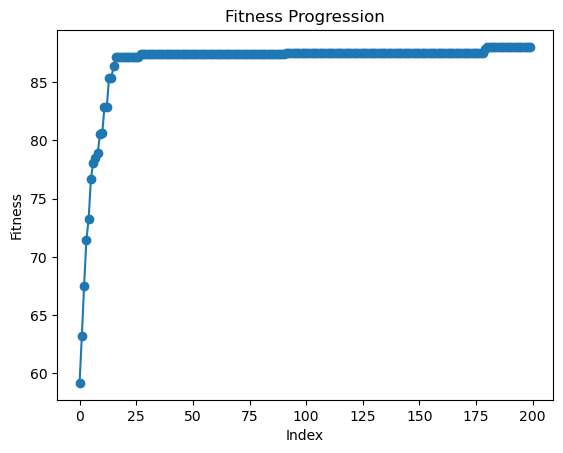

In [30]:
def genetic_algorythm (generations, n_mutacoes, aq_amount, wage_amount, df, TeamsList, nexGenPopulation, present_date_pandas):
    
    list_fitness = []
    
    for i in range(generations):
        rankedTeamList = []

        for team  in TeamsList:
            rankedTeamList.append( (fitness_function(team, aq_amount, wage_amount, df, present_date_pandas), team) )


        rankedTeamList.sort(key=lambda x: x[0], reverse=True)

        #print(rankedTeamList)
        print(f"=== Gen {i} best teams === ")
        print(rankedTeamList[0][0])
        list_fitness.append(rankedTeamList[0][0])


        bestTeams = rankedTeamList[:15]

        bestGK = []
        bestRB = []
        bestRCB = []
        bestLCB = []
        bestLB = []
        bestRM = []
        bestCM = []
        bestLM = []
        bestRF = []
        bestCF = []
        bestLF = []

        for team in bestTeams:
            bestGK.append(team[1]['gk'])
            bestRB.append(team[1]['rb'])
            bestRCB.append(team[1]['rcb']) 
            bestLCB.append(team[1]['lcb']) 
            bestLB.append(team[1]['lb']) 
            bestRM.append(team[1]['rm']) 
            bestCM.append(team[1]['cm']) 
            bestLM.append(team[1]['lm']) 
            bestRF.append(team[1]['rf']) 
            bestCF.append(team[1]['cf']) 
            bestLF.append(team[1]['lf'])  


        newGenTeamsList =[]
        newGenTeamsList.append(bestTeams[0][1])

        for _ in range(nexGenPopulation):

            newTeam = Team.copy()

            rGK = random.choice(bestGK)
            rRB = random.choice(bestRB)
            rRCB = random.choice(bestRCB)
            rLCB = random.choice(bestLCB)
            rLB = random.choice(bestLB) 
            rRM = random.choice(bestRM)
            rCM = random.choice(bestCM) 
            rLM = random.choice(bestLM) 
            rRF = random.choice(bestRF) 
            rCF = random.choice(bestCF) 
            rLF = random.choice(bestLF)

            rChoiceBTeam = []
            rChoiceBTeam.append(rGK)
            rChoiceBTeam.append(rRB)
            rChoiceBTeam.append(rRCB)
            rChoiceBTeam.append(rLCB)
            rChoiceBTeam.append(rLB)
            rChoiceBTeam.append(rRM)
            rChoiceBTeam.append(rCM)
            rChoiceBTeam.append(rLM)
            rChoiceBTeam.append(rRF)
            rChoiceBTeam.append(rCF)
            rChoiceBTeam.append(rLF)


            #chama função de atribuição de mutaçoes

            mutated_rChoiceBTeam = mutation(n_mutacoes, rChoiceBTeam, pos_dic, positionList)

            newTeam['gk'] = mutated_rChoiceBTeam[0]
            newTeam['rb'] = mutated_rChoiceBTeam[1]
            newTeam['rcb'] = mutated_rChoiceBTeam[2]
            newTeam['lcb'] = mutated_rChoiceBTeam[3] 
            newTeam['lb'] = mutated_rChoiceBTeam[4]
            newTeam['rm'] = mutated_rChoiceBTeam[5] 
            newTeam['cm'] = mutated_rChoiceBTeam[6]
            newTeam['lm'] = mutated_rChoiceBTeam[7] 
            newTeam['rf'] = mutated_rChoiceBTeam[8] 
            newTeam['cf'] = mutated_rChoiceBTeam[9] 
            newTeam['lf'] = mutated_rChoiceBTeam[10] 

            newGenTeamsList.append(newTeam)

        TeamsList = newGenTeamsList
        
    progression_graph (list_fitness)
    return rankedTeamList[0]
        
best_team = genetic_algorythm(generations, n_mutacoes, aq_amount, wage_amount, df, TeamsList, nexGenPopulation, present_date_pandas)
  

Função auxiliar que torna as chaves do dicionário maiúsculas:

In [31]:
def uppercase_keys(input_dict):
    return {key.upper(): value for key, value in input_dict.items()}

Melhor equipa obtida:

In [32]:
formato_pedido = ['Praia do Rosario FC', uppercase_keys(best_team[1])]
print(formato_pedido)


print("\033[1m\nInformações de teste:\033[0m")
print(f"População: {Population}")
print(f"Numero de gerações: {generations}")
print(f"Numero de mutações: {n_mutacoes}")
print(f"\nPreço de aquisição definido: {aq_amount}")
print(f"Preço de wage definido: {wage_amount}")

final_team_list = list(best_team[1].values())
final_players = df[df['player_id'].isin(final_team_list)]

total_acquisition_cost = final_players['value_eur'].sum()
total_wage_cost = final_players['wage_eur'].sum()

print(f"\nPreço de aquisição final: {total_acquisition_cost} | diferença: {aq_amount-total_acquisition_cost}")
print(f"Preço de wage final: {total_wage_cost} | diferença: {wage_amount-total_wage_cost}")

print("\033[1m\nEquipa Final:\033[0m")
print(f"Fitness Score: {best_team[0]}")

for pos, playerID in best_team[1].items():
    stat_value = findStat(playerID, 'short_name', original_df)

# Separating the output for better readability
print("\033[1m\nAttackers:\033[0m")
for position, player_id in best_team[1].items():
    if position in {'lf', 'rf', 'cf'}:
        print(f"{position.upper()}: {player_id} | {findStat(player_id, 'short_name', original_df)} | {findStat(player_id, position, df)}")

print("\033[1m\nMidfielders:\033[0m")
for position, player_id in best_team[1].items():
    if position in {'lm', 'rm', 'cm'}:
        print(f"{position.upper()}: {player_id} | {findStat(player_id, 'short_name', original_df)} | {findStat(player_id, position, df)}")

print("\033[1m\nDefenders:\033[0m")
for position, player_id in best_team[1].items():
    if position in {'lb', 'lcb', 'rcb', 'rb'}:
        print(f"{position.upper()}: {player_id} | {findStat(player_id, 'short_name', original_df)} | {findStat(player_id, position, df)}")

print("\033[1m\nGoalkeeper:\033[0m")
for position, player_id in best_team[1].items():
    if position == 'gk':
        print(f"{position.upper()}: {player_id} | {findStat(player_id, 'short_name', original_df)} | {findStat(player_id, position, df)}\n")
        
print("\033[1m\nResultados Fitness:\033[0m")
print(fitness_function_for_testing(best_team[1], aq_amount,wage_amount, df, present_date_pandas))

['Praia do Rosario FC', {'LM': 235212, 'RM': 210514, 'LCB': 239818, 'LF': 251566, 'RB': 216267, 'GK': 192119, 'LB': 225375, 'RCB': 231866, 'CF': 202126, 'CM': 218667, 'RF': 243812}]

Informações de teste:
População: 500
Numero de gerações: 200
Numero de mutações: 1

Preço de aquisição definido: 849000000
Preço de wage definido: 2126000

Preço de aquisição final: 841500000.0 | diferença: 7500000.0
Preço de wage final: 2075000.0 | diferença: 51000.0

Equipa Final:
Fitness Score: 88.0082507524096

Attackers:
LF: 251566 | Gabriel Martinelli | 83.5
CF: 202126 | H. Kane | 88.5
RF: 243812 | Rodrygo | 84.75

Midfielders:
LM: 235212 | A. Hakimi | 85.0
RM: 210514 | João Cancelo | 86.0
CM: 218667 | Bernardo Silva | 88.0

Defenders:
LCB: 239818 | Rúben Dias | 90.0
RB: 216267 | A. Robertson | 85.5
LB: 225375 | K. Laimer | 84.0
RCB: 231866 | Rodri | 88.5

Goalkeeper:
GK: 192119 | T. Courtois | 87


Resultados Fitness:
average player score: 81.45183506809225
average overall: 86.72727272727273
price s

In [33]:
realmadrid_list = list(realmadrid.values())
realmadrid_players = df[df['player_id'].isin(realmadrid_list)]

total_acquisition_cost = realmadrid_players['value_eur'].sum()
total_wage_cost = realmadrid_players['wage_eur'].sum()

print(f"\nPreço de aquisição final: {total_acquisition_cost} | diferença: {aq_amount-total_acquisition_cost}")
print(f"Preço de wage final: {total_wage_cost} | diferença: {wage_amount-total_wage_cost}")

for pos, playerID in realmadrid.items():
    stat_value = findStat(playerID, 'short_name', original_df)

# Separating the output for better readability
print("\033[1m\nAttackers:\033[0m")
for position, player_id in realmadrid.items():
    if position in {'lf', 'rf', 'cf'}:
        print(f"{position.upper()}: {player_id} | {findStat(player_id, 'short_name', original_df)} | {findStat(player_id, position, df)}")

print("\033[1m\nMidfielders:\033[0m")
for position, player_id in realmadrid.items():
    if position in {'lm', 'rm', 'cm'}:
        print(f"{position.upper()}: {player_id} | {findStat(player_id, 'short_name', original_df)} | {findStat(player_id, position, df)}")

print("\033[1m\nDefenders:\033[0m")
for position, player_id in realmadrid.items():
    if position in {'lb', 'lcb', 'rcb', 'rb'}:
        print(f"{position.upper()}: {player_id} | {findStat(player_id, 'short_name', original_df)} | {findStat(player_id, position, df)}")

print("\033[1m\nGoalkeeper:\033[0m")
for position, player_id in realmadrid.items():
    if position == 'gk':
        print(f"{position.upper()}: {player_id} | {findStat(player_id, 'short_name', original_df)} | {findStat(player_id, position, df)}\n")
        
print(f"fitness score: {fitness_function_for_testing(realmadrid, 849000000,2126000, df, present_date_pandas)}")


Preço de aquisição final: 849000000.0 | diferença: 0.0
Preço de wage final: 2126000.0 | diferença: 0.0

Attackers:
LF: 238794 | Vini Jr. | 87.0
CF: 252371 | J. Bellingham | 83.0
RF: 243812 | Rodrygo | 84.75

Midfielders:
LM: 248243 | E. Camavinga | 82.5
RM: 239053 | F. Valverde | 87.5
CM: 241637 | A. Tchouaméni | 83.5

Defenders:
LCB: 197445 | D. Alaba | 85.0
RB: 244260 | Dani Olmo | 69.0
LB: 228618 | F. Mendy | 81.5
RCB: 240130 | Éder Militão | 86.0

Goalkeeper:
GK: 192119 | T. Courtois | 87

average player score: 81.7812937846925
average overall: 85.45454545454545
price score: 100.0
wage score: 100.0
variance score: 91.99189555712628
fitness score: 87.54807070595325


Função auxiliar para verificar se os jogadores são de facto das posições corretas:

In [34]:
def print_attributes_by_player_id(player_id, attributes_to_print, df):
    # Find the player with the given player_id
    player_row = df[df['player_id'] == player_id]

    # Check if the player_id exists in the dataset
    if player_row.empty:
        print(f"No player found with player_id {player_id}")
        return

    # Print the specified attributes for the player
    for attribute in attributes_to_print:
        print(f"{attribute}: {player_row[attribute].values[0]}")

In [35]:
# Example usage
attributes_to_print = ['gk', 'lf', 'cf', 'rf', 'lm', 'cm', 'rm', 'lb', 'lcb', 'rcb', 'rb']

player_id_to_print = 209331   # Replace with the desired player_id

print_attributes_by_player_id(player_id_to_print, attributes_to_print, df)

gk: 12
lf: 88.0
cf: 87.5
rf: 88.0
lm: 81.5
cm: 86.0
rm: 81.5
lb: 70.5
lcb: 61.0
rcb: 66.0
rb: 70.5
